# ros_yolov5 ReadMe

## Installation
1. Put the ros_yolov5 folder inside your ros **workspace/src** folder and rebuild the workspace
   <br>ex.
   ```bash
   mv ros_yolov5 /home/user/catkin_ws/src 
   roscd
   cd ..
   catkin_make
   source devel/setup.bash
   ```
1. Install dependencies:

    1. If you have anaconda installed **(tested)**:
        1. Create a conda virtual environment: 
        ```
        conda create -n envname python=x.x jupyter

        ex.
        conda create -n rospytorch python=3.8 jupyter
        ```
        1. Activate your new virtual environment using:
           <br>For windows: ```activate rospytorch```
           <br>For linux: ```source activate rospyorch```
           <br>instead of **rospytorch** use the name of your virtual envirnment if it is different
           <br>
        1. Go to __[pytorch get-started guide](https://pytorch.org/get-started/locally/)__,
           <br>insert your specifications for **os** (windows/linux) and **Compute Platform** cpu/gpu etc.)
           <br>for the other options use:
           <br>**PyTorch Build**: LTS(1.8.2)
           <br>**Package**: Conda
           <br>copy the installation command next to **Run this command** to your terminal and run it
           <br>ex. ```conda install pytorch torchvision torchaudio cpuonly -c pytorch-lts```
           <br>
        1. To install the rest of the dipendencies:
           ```bash
           roscd ros_yolov5/yolov5
           sudo apt-get install python3-pip python3-yaml
           pip3 install -r requirements.txt
           pip3 install rospkg catkin_pkg
           ```
           
    1. If you don't have anaconda installed **(untested)**:
        1. Go to __[pytorch get-started guide](https://pytorch.org/get-started/locally/)__,
           <br>insert your specifications for **os** (windows/linux) and **Compute Platform** cpu/gpu etc.)
           <br>for the other options use:
           <br>**PyTorch Build**: LTS(1.8.2)
           <br>**Package**: Pip
           <br>copy the installation command next to **Run this command** to your terminal and run it
           <br>ex. ```pip3 install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html```
           <br>
        1. To install the rest of the dipendencies:
           ```bash
           roscd ros_yolov5/yolov5
           sudo apt-get install python3-pip python3-yaml
           pip3 install -r requirements.txt
           pip3 install rospkg catkin_pkg
           ```
1. Modify the shebang at the top of ros_yolov5.py file at ros_yolov5/src/ros_yolov5.py to:
   ```python
   #!/usr/bin/env/python
   ```
   or
   ```python
   #!/usr/bin/env/python3
   ```
   or any other interpreter you are using
   <br>To find your interpreter open a terminal and type
   ```bash
   python
   import sys
   print(sys.executable)
   ```
   copy the path without ```'``` and add ```#!``` at the front

## Usage

To change the weights that Yolov5 uses open ```ros_yolov5.launch``` on ```ros_yolov5/launch/ros_yolov5.launch``` and change the **value** of the parameter **weights_path** to point to your **pt** file

ros_yolov5 is now ready to run.
open a terminal and run ```roslaunch ros_yolov5 ros_yolov5.launch```

Node name: **yolov5_object_detector**

Publishers: 
 * /object_detection/counter [std_msgs/String]
 * /object_detection/image [sensor_msgs/Image]
 * /object_detection/names [std_msgs/String]
 * /object_detection/objects [std_msgs/String]

Subscribers
 * /camera/rgb/image_raw [sensor_msgs/Image]


### Demo node to demonstrate how to use ros_yolov5

In [1]:
# Helper imports to visualize image messages in notebook
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
import json
import numpy as np

import rospy
from std_msgs.msg import String
from sensor_msgs.msg import Image

rospy.init_node('ros_yolov5_consumer')

#### Detected object names

In [3]:
# Each message is a list of names of detected objects
# If an object is present multiple times then there is one name for each instance on the list
# ex. If there are 2 cocacola cans then the message is ['cocacola', 'cocacola']
def detected_names_cb(msg):
    object_names_list = json.loads(msg.data)
    print(object_names_list)
    
    print(f'Found {len(object_names_list)} objects')
    
    
detected_names_sub = rospy.Subscriber('/object_detection/names', String, callback=detected_names_cb)

# just for jupyter notebook, not needed on production node
time.sleep(0.5)
detected_names_sub.unregister()

['estathe', 'beer', 'estathe']
Found 3 objects


#### Detected object details

In [4]:
# Each message contains is a list of detected objects
# Each object is represented by a list with format
# [startx, starty, endx, endy, confidence, class_id, class_name]
def detected_objects_cb(msg):
    object_list = json.loads(msg.data)
    
    for obj in object_list:
        print(obj)
    
    print(f'Found {len(object_list)} objects')
    
    
detected_objects_sub = rospy.Subscriber('/object_detection/objects', String, callback=detected_objects_cb)

# just for jupyter notebook, not needed on production node
time.sleep(0.5)
detected_objects_sub.unregister()

[72, 186, 149, 348, 0.8162909746170044, 4, 'estathe']
[385, 62, 478, 410, 0.6203822493553162, 0, 'beer']
[225, 188, 308, 368, 0.5469662547111511, 4, 'estathe']
Found 3 objects


#### Detection counter

In [5]:
def detected_count_cb(msg):
    count_dict = json.loads(msg.data)
    print(count_dict)
    
detected_count_sub = rospy.Subscriber('/object_detection/counter', String, callback=detected_count_cb)

# just for jupyter notebook, not needed on production node
time.sleep(0.5)
detected_count_sub.unregister()

{'estathe': 2, 'beer': 1}


#### Annotated image

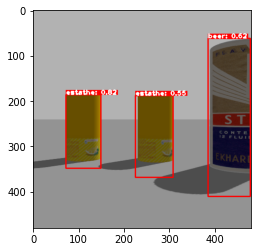

In [6]:
def image_cb(msg):
    img = np.frombuffer(msg.data, dtype=np.uint8)
    img = img.reshape((msg.height, msg.width, 3))
    
    plt.imshow(img)
    
annotaded_img_sub = rospy.Subscriber('/object_detection/image', Image, callback=image_cb)

# just for jupyter notebook, not needed on production node
time.sleep(1)
annotaded_img_sub.unregister()